# Single-Task Learning on Cifar10 Dataset (2 Classes): A CNN Approach
- **Name**: Minh T. Nguyen & Peter Chen.
- **ECE 6524** - Final Project.
- **Date**: 4/18/2023.
- **Objective**: Build a Single Task CNN model using ResNet152 architecture for 2-classes image classification on Cifar10.

In [1]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt

# import tensorflow
import tensorflow as tf
from keras.datasets import cifar10
from keras.utils import np_utils, plot_model
from keras.layers import Input, Dropout, Flatten, Dense
from keras.applications.resnet import ResNet152, preprocess_input
from keras import Model, Sequential

# 1. Data Visualization & Preprocessing

In [2]:
num_classes = 2           # number of classes
input_shape = (32, 32, 3) # original input image size

In [3]:
# download data from Keras API
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 3s 0us/step


In [4]:
# check dataset size
print(f"X={X_train.shape}, y={y_train.shape}")
print(f"X={X_test.shape}, y={y_test.shape}")

X=(50000, 32, 32, 3), y=(50000, 1)
X=(10000, 32, 32, 3), y=(10000, 1)


## 1.1. Data Visualization

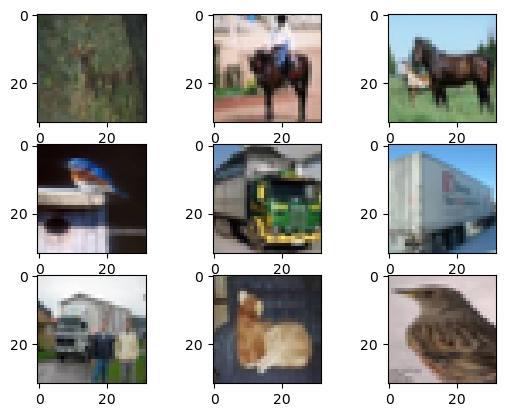

In [5]:
# plot the 9 images
f, axarr = plt.subplots(3,3)
axarr[0,0].imshow(X_train[10])
axarr[0,1].imshow(X_train[11])
axarr[0,2].imshow(X_train[12])
axarr[1,0].imshow(X_train[13])
axarr[1,1].imshow(X_train[14])
axarr[1,2].imshow(X_train[15])
axarr[2,0].imshow(X_train[16])
axarr[2,1].imshow(X_train[17])
axarr[2,2].imshow(X_train[18])
plt.show()

## 1.2. Creating Superclasses
The super-classes are divided into animals and vehicles:
- **Animals**: Bird, Cat, Deer, Dog, Frog, Horse. (5000x6 training images, 1000x6 testing images).
- **Vehicles**: Airplane, Automotive, Ship, Truck. (5000x4 training images, 1000x4 testing images).

From [Cifar 10 Dataset](https://www.cs.toronto.edu/~kriz/cifar.html), we know that the labels have the corresponding label number:
- Airplane: 0.
- Automobile: 1.
- Bird: 2.
- Cat: 3.
- Deer: 4.
- Dog: 5.
- Frog: 6.
- Horse: 7.
- Ship: 8.
- Truck 9.

In [6]:
# define superclasses (0 = animal, 1 = vehicle)
animal_classes = [2, 3, 4, 5, 6, 7]
y_train = [0 if y in animal_classes else 1 for y in y_train ] 
y_test = [0 if y in animal_classes else 1 for y in y_test]

print(len(y_train))
print(len(y_test))

50000
10000


In [7]:
# check labels for accuracy (referencing image plotted above)
print(y_train[10:19])

[0, 0, 0, 0, 1, 1, 1, 0, 0]


## 1.3. Data Preprocessing

In [8]:
# normalize input data
X_train = preprocess_input(X_train)
X_test = preprocess_input(X_test)

print(X_train.shape)
print(X_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [9]:
# reshape y_train and y_test match shape of X_train and X_test
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

print(y_train.shape)
print(y_test.shape)

(50000, 2)
(10000, 2)


# 2. Modeling
**Note**: Build a sequential model using ResNet152 architecture

In [10]:
# Define ResNet152 CNN model
def create_model(dropout):
    input_shape = (32, 32, 3)
    
    resnet152_base = ResNet152(weights=None, include_top=False, input_shape=input_shape)
    
    model = Sequential()
    
    model.add(resnet152_base)
    model.add(Flatten())
    model.add(Dense(2048, activation='relu'))
    model.add(Dropout(dropout))
    model.add(Dense(1024, activation='relu'))
    model.add(Dropout(dropout))
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(dropout))
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(dropout))
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(dropout))
    model.add(Dense(2, activation='softmax'))
    
    return model

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet152 (Functional)      (None, 1, 1, 2048)        58370944  
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 2048)              4196352   
                                                                 
 dropout (Dropout)           (None, 2048)              0         
                                                                 
 dense_1 (Dense)             (None, 1024)              2098176   
                                                                 
 dropout_1 (Dropout)         (None, 1024)              0         
                                                                 
 dense_2 (Dense)             (None, 512)               5

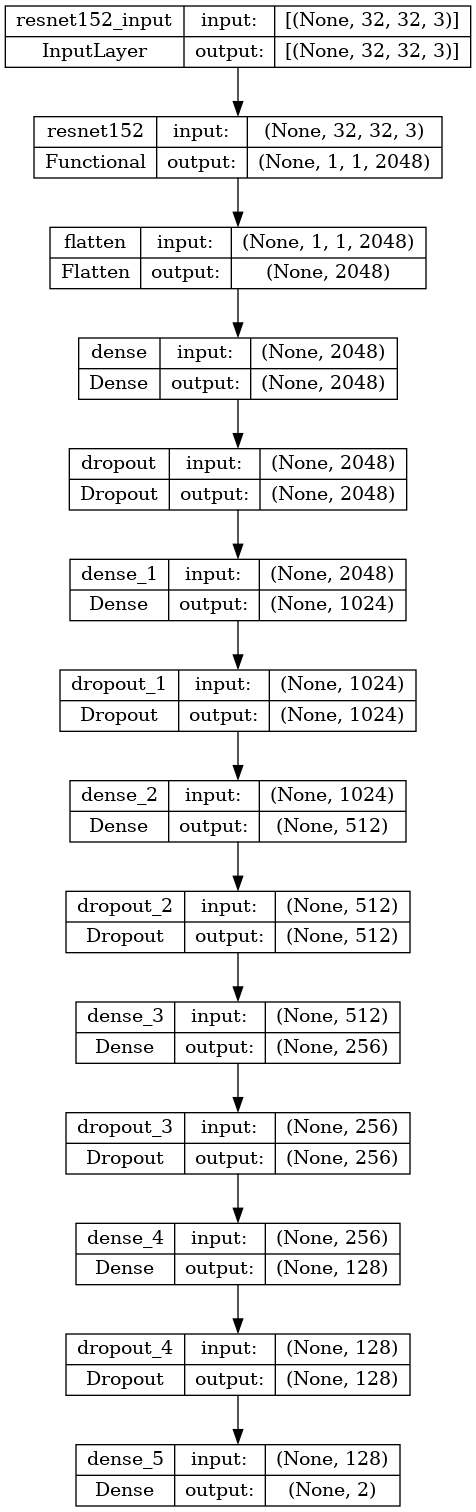

In [11]:
# display and plot model
model = create_model(0)
print(model.summary())
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [12]:
# define number of epochs
epochs = 20

# 2.1 Model 1 (Batch Size = 256, Dropout = 0, Optimizer = Adam)


In [13]:
# define parameters and generate model
batch_size = 256
dropout = 0
optimizer = 'Adam'

model_1 = create_model(dropout)

In [14]:
# compile model
model_1.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [15]:
# train model
history_1 = model_1.fit(X_train, y_train, validation_data=(X_test, y_test), 
            batch_size=batch_size, epochs=epochs, verbose=1)

Epoch 1/20
196/196 [==============================] - 147s 205ms/step - loss: 0.4092 - accuracy: 0.8098 - val_loss: 0.4792 - val_accuracy: 0.7598
Epoch 2/20
196/196 [==============================] - 37s 188ms/step - loss: 0.2396 - accuracy: 0.9026 - val_loss: 0.2655 - val_accuracy: 0.9024
Epoch 3/20
196/196 [==============================] - 37s 188ms/step - loss: 0.2057 - accuracy: 0.9206 - val_loss: 0.3216 - val_accuracy: 0.8742
Epoch 4/20
196/196 [==============================] - 36s 186ms/step - loss: 0.1750 - accuracy: 0.9316 - val_loss: 0.3213 - val_accuracy: 0.8890
Epoch 5/20
196/196 [==============================] - 37s 188ms/step - loss: 0.1505 - accuracy: 0.9407 - val_loss: 0.2517 - val_accuracy: 0.9184
Epoch 6/20
196/196 [==============================] - 37s 188ms/step - loss: 0.1675 - accuracy: 0.9381 - val_loss: 1.0084 - val_accuracy: 0.9056
Epoch 7/20
196/196 [==============================] - 37s 186ms/step - loss: 0.1223 - accuracy: 0.9534 - val_loss: 0.2632 - val_a

In [16]:
# train model results
print('Train Loss:', history_1.history['loss'][-1])
print('Train Acc:', history_1.history['accuracy'][-1])


# validation results
val_loss, val_acc = model_1.evaluate(X_test, y_test, verbose=0)

print('\nTest Loss:', val_loss)
print('Test Acc:', val_acc)

Train Loss: 0.07579407095909119
Train Acc: 0.9716200232505798

Test Loss: 0.27570387721061707
Test Acc: 0.9235000014305115


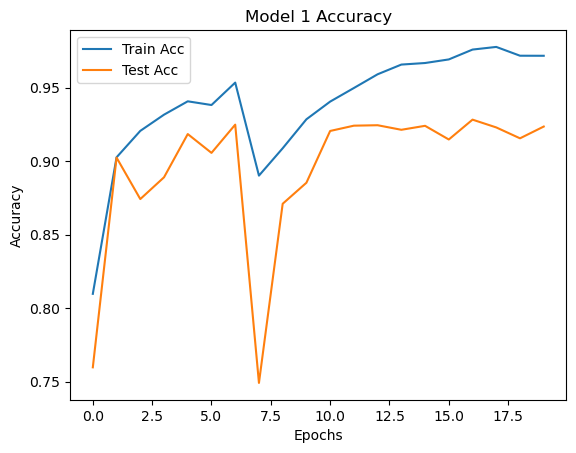

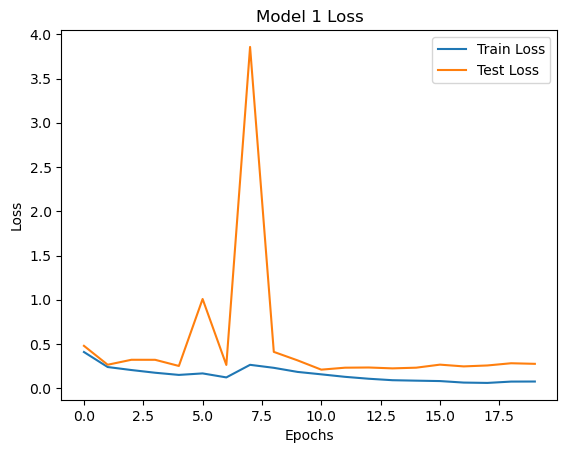

In [17]:
# Accuracy Plot
plt.plot(history_1.history['accuracy'], label='Train Acc')
plt.plot(history_1.history['val_accuracy'], label='Test Acc')
plt.title('Model 1 Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.show()

# Loss Plot
plt.plot(history_1.history['loss'], label='Train Loss')
plt.plot(history_1.history['val_loss'], label='Test Loss')
plt.title('Model 1 Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend()
plt.show()

# 2.2 Model 2 (Batch Size = 128, Dropout = 0, Optimizer = Adam)

In [18]:
# define parameters and generate model
batch_size = 128
dropout = 0
optimizer = 'Adam'

model_2 = create_model(dropout)

In [19]:
# compile model
model_2.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [20]:
# train model
history_2 = model_2.fit(X_train, y_train, validation_data=(X_test, y_test), 
            batch_size=batch_size, epochs=epochs, verbose=1)

Epoch 1/20
391/391 [==============================] - 156s 143ms/step - loss: 0.3547 - accuracy: 0.8520 - val_loss: 0.2795 - val_accuracy: 0.8888
Epoch 2/20
391/391 [==============================] - 53s 136ms/step - loss: 0.2312 - accuracy: 0.9085 - val_loss: 0.2793 - val_accuracy: 0.8925
Epoch 3/20
391/391 [==============================] - 55s 140ms/step - loss: 0.1978 - accuracy: 0.9222 - val_loss: 0.3118 - val_accuracy: 0.9122
Epoch 4/20
391/391 [==============================] - 55s 141ms/step - loss: 0.1734 - accuracy: 0.9327 - val_loss: 0.1926 - val_accuracy: 0.9227
Epoch 5/20
391/391 [==============================] - 55s 141ms/step - loss: 0.2050 - accuracy: 0.9219 - val_loss: 0.2337 - val_accuracy: 0.9208
Epoch 6/20
391/391 [==============================] - 53s 135ms/step - loss: 0.1497 - accuracy: 0.9419 - val_loss: 0.2356 - val_accuracy: 0.9218
Epoch 7/20
391/391 [==============================] - 53s 135ms/step - loss: 0.1309 - accuracy: 0.9490 - val_loss: 0.2585 - val_a

In [21]:
# train model results
print('Train Loss:', history_2.history['loss'][-1])
print('Train Acc:', history_2.history['accuracy'][-1])


# validation results
val_loss, val_acc = model_2.evaluate(X_test, y_test, verbose=0)

print('\nTest Loss:', val_loss)
print('Test Acc:', val_acc)

Train Loss: 0.06481330841779709
Train Acc: 0.9756600260734558

Test Loss: 0.27934587001800537
Test Acc: 0.9333000183105469


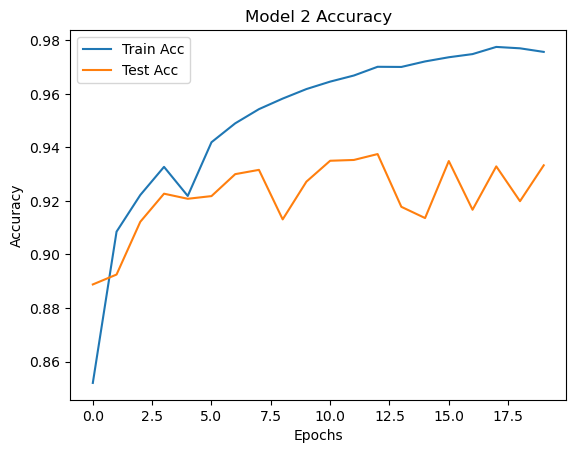

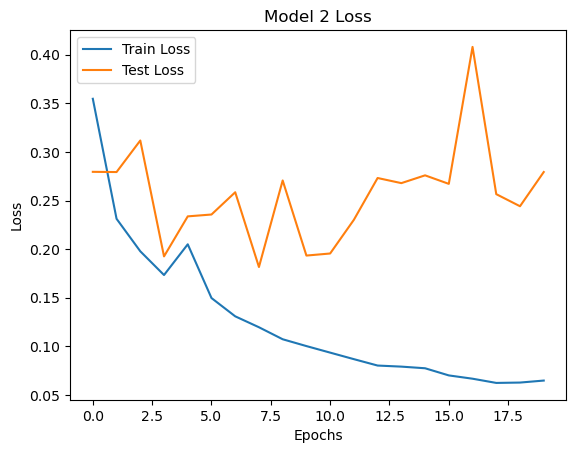

In [22]:
# Accuracy Plot
plt.plot(history_2.history['accuracy'], label='Train Acc')
plt.plot(history_2.history['val_accuracy'], label='Test Acc')
plt.title('Model 2 Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.show()

# Loss Plot
plt.plot(history_2.history['loss'], label='Train Loss')
plt.plot(history_2.history['val_loss'], label='Test Loss')
plt.title('Model 2 Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend()
plt.show()

# 2.3 Model 3 (Batch Size = 256, Dropout = 0.5, Optimizer = Adam)

In [23]:
# define parameters and generate model
batch_size = 128
dropout = 0.5
optimizer = 'Adam'

model_3 = create_model(dropout)

In [24]:
# compile model
model_3.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [25]:
# train model
history_3 = model_3.fit(X_train, y_train, validation_data=(X_test, y_test), 
            batch_size=batch_size, epochs=epochs, verbose=1)

Epoch 1/20
391/391 [==============================] - 157s 148ms/step - loss: 0.6445 - accuracy: 0.7261 - val_loss: 0.3720 - val_accuracy: 0.8573
Epoch 2/20
391/391 [==============================] - 55s 142ms/step - loss: 0.3223 - accuracy: 0.8788 - val_loss: 0.3622 - val_accuracy: 0.8816
Epoch 3/20
391/391 [==============================] - 54s 137ms/step - loss: 0.2654 - accuracy: 0.9007 - val_loss: 0.9522 - val_accuracy: 0.8976
Epoch 4/20
391/391 [==============================] - 55s 141ms/step - loss: 0.2364 - accuracy: 0.9114 - val_loss: 9.9152 - val_accuracy: 0.8835
Epoch 5/20
391/391 [==============================] - 55s 142ms/step - loss: 0.2616 - accuracy: 0.9024 - val_loss: 0.4848 - val_accuracy: 0.8938
Epoch 6/20
391/391 [==============================] - 53s 136ms/step - loss: 0.2340 - accuracy: 0.9117 - val_loss: 1.2922 - val_accuracy: 0.8900
Epoch 7/20
391/391 [==============================] - 54s 137ms/step - loss: 0.2844 - accuracy: 0.8914 - val_loss: 0.2535 - val_a

In [26]:
# train model results
print('Train Loss:', history_3.history['loss'][-1])
print('Train Acc:', history_3.history['accuracy'][-1])


# validation results
val_loss, val_acc = model_3.evaluate(X_test, y_test, verbose=0)

print('\nTest Loss:', val_loss)
print('Test Acc:', val_acc)

Train Loss: 0.34219300746917725
Train Acc: 0.8696200251579285

Test Loss: 0.44769591093063354
Test Acc: 0.7074999809265137


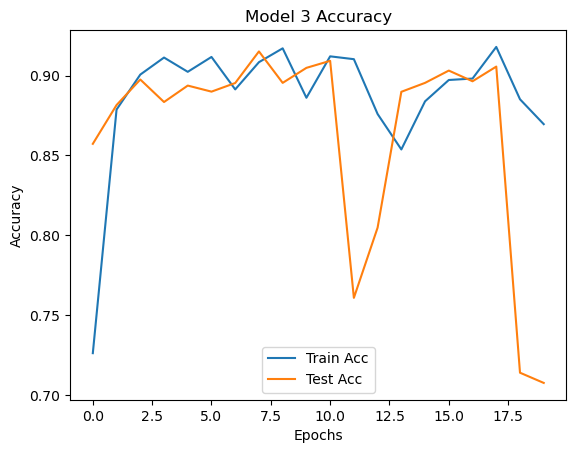

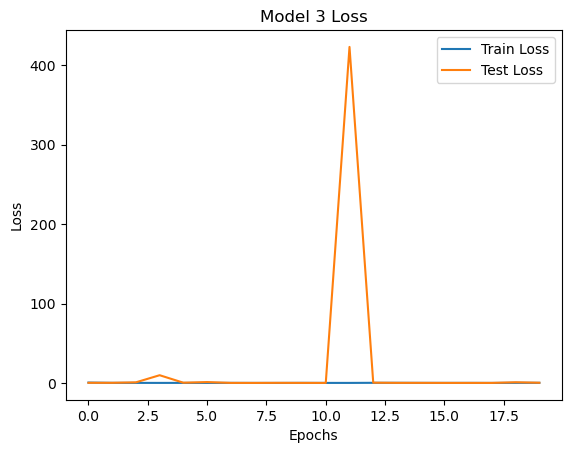

In [27]:
# Accuracy Plot
plt.plot(history_3.history['accuracy'], label='Train Acc')
plt.plot(history_3.history['val_accuracy'], label='Test Acc')
plt.title('Model 3 Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.show()

# Loss Plot
plt.plot(history_3.history['loss'], label='Train Loss')
plt.plot(history_3.history['val_loss'], label='Test Loss')
plt.title('Model 3 Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend()
plt.show()

# 2.4 Model 4 (Batch Size = 256, Dropout = 0, Optimizer = SGD)

In [28]:
# define parameters and generate model
batch_size = 256
dropout = 0
optimizer = 'SGD'

model_4 = create_model(dropout)

In [29]:
# compile model
model_4.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [30]:
# train model
history_4 = model_4.fit(X_train, y_train, validation_data=(X_test, y_test), 
            batch_size=batch_size, epochs=epochs, verbose=1)

Epoch 1/20
196/196 [==============================] - 83s 199ms/step - loss: 0.5829 - accuracy: 0.6903 - val_loss: 0.7090 - val_accuracy: 0.6034
Epoch 2/20
196/196 [==============================] - 35s 181ms/step - loss: 0.4105 - accuracy: 0.8200 - val_loss: 0.5560 - val_accuracy: 0.7040
Epoch 3/20
196/196 [==============================] - 35s 179ms/step - loss: 0.3374 - accuracy: 0.8577 - val_loss: 0.3581 - val_accuracy: 0.8474
Epoch 4/20
196/196 [==============================] - 35s 179ms/step - loss: 0.2926 - accuracy: 0.8795 - val_loss: 0.3213 - val_accuracy: 0.8718
Epoch 5/20
196/196 [==============================] - 35s 181ms/step - loss: 0.2671 - accuracy: 0.8906 - val_loss: 0.3030 - val_accuracy: 0.8744
Epoch 6/20
196/196 [==============================] - 35s 181ms/step - loss: 0.2421 - accuracy: 0.9030 - val_loss: 0.3010 - val_accuracy: 0.8789
Epoch 7/20
196/196 [==============================] - 35s 179ms/step - loss: 0.2211 - accuracy: 0.9121 - val_loss: 0.3040 - val_ac

In [31]:
# train model results
print('Train Loss:', history_4.history['loss'][-1])
print('Train Acc:', history_4.history['accuracy'][-1])


# validation results
val_loss, val_acc = model_4.evaluate(X_test, y_test, verbose=0)

print('\nTest Loss:', val_loss)
print('Test Acc:', val_acc)

Train Loss: 0.0413176566362381
Train Acc: 0.9841200113296509

Test Loss: 0.5453300476074219
Test Acc: 0.8810999989509583


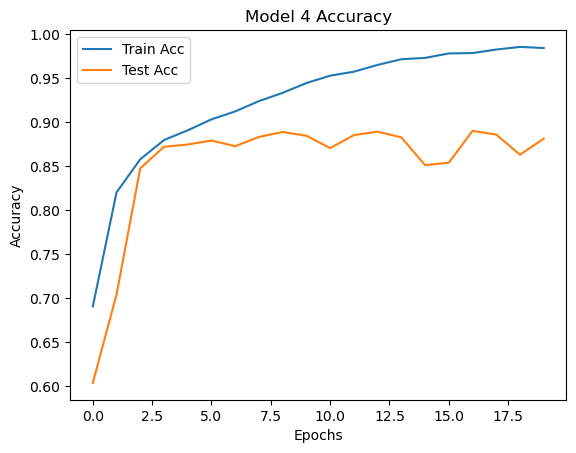

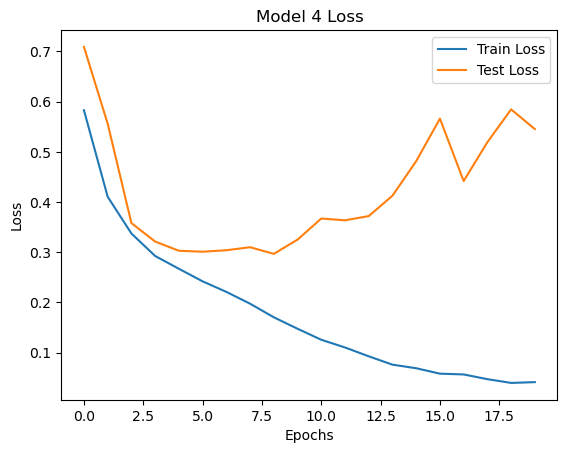

In [32]:
# Accuracy Plot
plt.plot(history_4.history['accuracy'], label='Train Acc')
plt.plot(history_4.history['val_accuracy'], label='Test Acc')
plt.title('Model 4 Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.show()

# Loss Plot
plt.plot(history_4.history['loss'], label='Train Loss')
plt.plot(history_4.history['val_loss'], label='Test Loss')
plt.title('Model 4 Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend()
plt.show()

# 2.5 Model 5 (Batch Size = 128, Dropout = 0, Optimizer = SGD)

In [33]:
# define parameters and generate model
batch_size = 128
dropout = 0
optimizer = 'SGD'

model_5 = create_model(dropout)

In [34]:
# compile model
model_5.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [35]:
# train model
history_5 = model_5.fit(X_train, y_train, validation_data=(X_test, y_test), 
            batch_size=batch_size, epochs=epochs, verbose=1)

Epoch 1/20
391/391 [==============================] - 100s 143ms/step - loss: 0.5131 - accuracy: 0.7449 - val_loss: 0.4722 - val_accuracy: 0.7801
Epoch 2/20
391/391 [==============================] - 53s 136ms/step - loss: 0.3688 - accuracy: 0.8389 - val_loss: 0.3526 - val_accuracy: 0.8490
Epoch 3/20
391/391 [==============================] - 51s 130ms/step - loss: 0.3030 - accuracy: 0.8740 - val_loss: 0.2894 - val_accuracy: 0.8813
Epoch 4/20
391/391 [==============================] - 53s 136ms/step - loss: 0.2665 - accuracy: 0.8908 - val_loss: 0.2863 - val_accuracy: 0.8813
Epoch 5/20
391/391 [==============================] - 53s 136ms/step - loss: 0.2401 - accuracy: 0.9019 - val_loss: 0.2757 - val_accuracy: 0.8911
Epoch 6/20
391/391 [==============================] - 50s 129ms/step - loss: 0.2125 - accuracy: 0.9145 - val_loss: 0.2735 - val_accuracy: 0.8933
Epoch 7/20
391/391 [==============================] - 53s 136ms/step - loss: 0.1898 - accuracy: 0.9233 - val_loss: 0.3057 - val_a

In [36]:
# train model results
print('Train Loss:', history_5.history['loss'][-1])
print('Train Acc:', history_5.history['accuracy'][-1])


# validation results
val_loss, val_acc = model_5.evaluate(X_test, y_test, verbose=0)

print('\nTest Loss:', val_loss)
print('Test Acc:', val_acc)

Train Loss: 0.044250037521123886
Train Acc: 0.9828600287437439

Test Loss: 0.4856557548046112
Test Acc: 0.8877999782562256


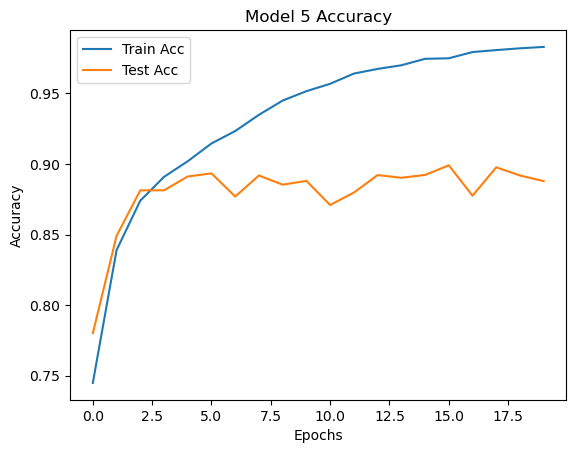

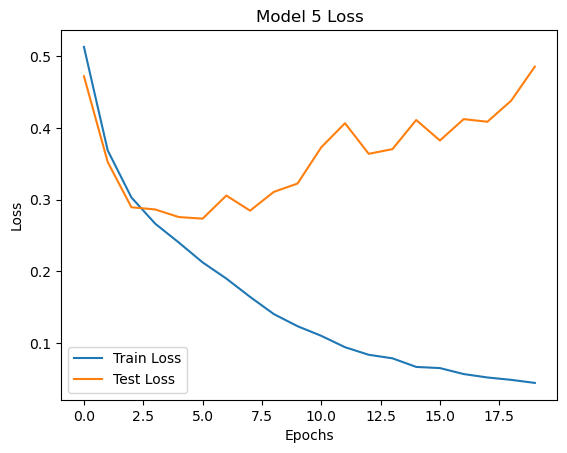

In [37]:
# Accuracy Plot
plt.plot(history_5.history['accuracy'], label='Train Acc')
plt.plot(history_5.history['val_accuracy'], label='Test Acc')
plt.title('Model 5 Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.show()

# Loss Plot
plt.plot(history_5.history['loss'], label='Train Loss')
plt.plot(history_5.history['val_loss'], label='Test Loss')
plt.title('Model 5 Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend()
plt.show()

# 2.6 Model 6 (Batch Size = 256, Dropout = 0.5, Optimizer = SGD)

In [38]:
# define parameters and generate model
batch_size = 256
dropout = 0.5
optimizer = 'SGD'

model_6 = create_model(dropout)

In [39]:
# compile model
model_6.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [40]:
# train model
history_6 = model_6.fit(X_train, y_train, validation_data=(X_test, y_test), 
            batch_size=batch_size, epochs=epochs, verbose=1)

Epoch 1/20
196/196 [==============================] - 82s 202ms/step - loss: 0.8106 - accuracy: 0.5627 - val_loss: 0.6838 - val_accuracy: 0.6000
Epoch 2/20
196/196 [==============================] - 35s 179ms/step - loss: 0.6996 - accuracy: 0.5910 - val_loss: 0.6792 - val_accuracy: 0.6000
Epoch 3/20
196/196 [==============================] - 36s 182ms/step - loss: 0.6175 - accuracy: 0.6264 - val_loss: 0.5747 - val_accuracy: 0.7788
Epoch 4/20
196/196 [==============================] - 36s 182ms/step - loss: 0.5331 - accuracy: 0.7433 - val_loss: 0.4830 - val_accuracy: 0.7789
Epoch 5/20
196/196 [==============================] - 35s 179ms/step - loss: 0.4371 - accuracy: 0.8272 - val_loss: 0.3794 - val_accuracy: 0.8404
Epoch 6/20
196/196 [==============================] - 35s 179ms/step - loss: 0.3781 - accuracy: 0.8571 - val_loss: 0.3467 - val_accuracy: 0.8521
Epoch 7/20
196/196 [==============================] - 35s 181ms/step - loss: 0.3336 - accuracy: 0.8734 - val_loss: 0.3207 - val_ac

In [41]:
# train model results
print('Train Loss:', history_6.history['loss'][-1])
print('Train Acc:', history_6.history['accuracy'][-1])


# validation results
val_loss, val_acc = model_6.evaluate(X_test, y_test, verbose=0)

print('\nTest Loss:', val_loss)
print('Test Acc:', val_acc)

Train Loss: 0.08692848682403564
Train Acc: 0.9703800082206726

Test Loss: 0.490600049495697
Test Acc: 0.8651000261306763


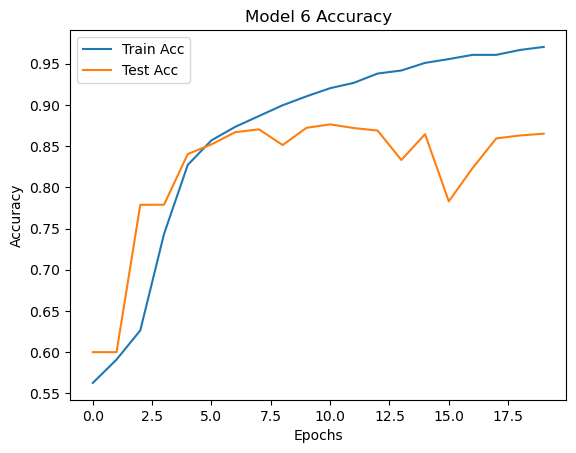

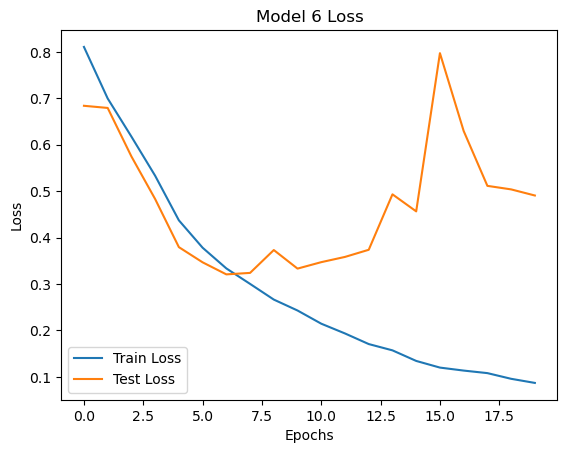

In [42]:
# Accuracy Plot
plt.plot(history_6.history['accuracy'], label='Train Acc')
plt.plot(history_6.history['val_accuracy'], label='Test Acc')
plt.title('Model 6 Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.show()

# Loss Plot
plt.plot(history_6.history['loss'], label='Train Loss')
plt.plot(history_6.history['val_loss'], label='Test Loss')
plt.title('Model 6 Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend()
plt.show()